<a href="https://colab.research.google.com/github/ravi-prakash1907/Data-Structures-and-Algo/blob/main/Submissions/Group%20Projects/Project1/A%20Web%20History%20Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 1** (DSA)  

## A Web History Tracker

---

### **Objective**  

_“You are a python developer specialized in the linked list. The customer has a very specific need that requires the extensive use of Linked List. They have a requirement to build a tracking algorithm that can store and track the list of pages you visited while browsing the internet along with timestamp information. Write a program that takes in the website addresses or links and corresponding timestamp information. There should be an option to clear the tracked information and also have an option to backup history. The program should be able to also identify duplicate entries. After every 100 links you visit, the program refreshes the memory and starts from scratch.”_

---

**([_Detailed Report (PDF) Here_](https://github.com/ravi-prakash1907/Data-Structures-and-Algo/raw/main/Submissions/Group%20Projects/Project1/A%20Web%20History%20Tracker%20%28DSA%29.pdf))**  

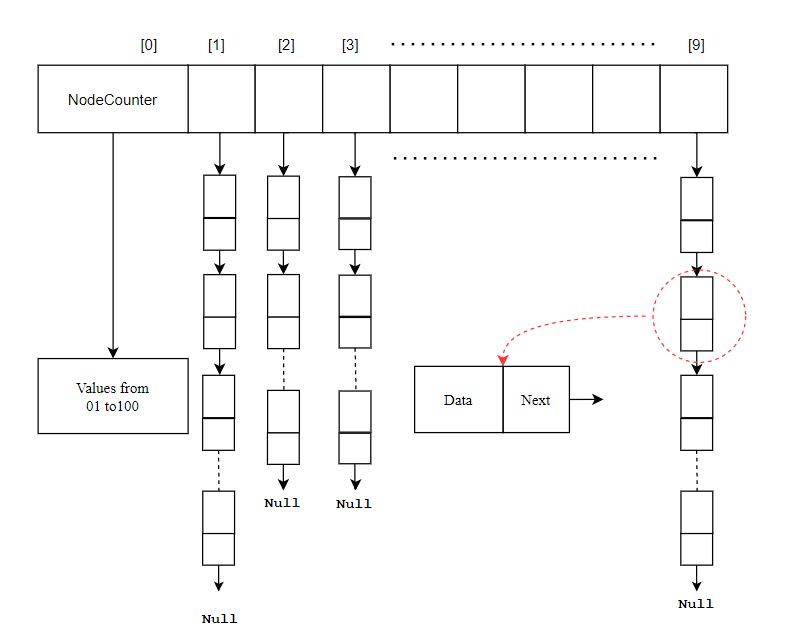


### _Libraries_

In [ ]:
from IPython.display import clear_output
from datetime import datetime
import time
import re

### Hash Value Generator

In [ ]:
def numericToHashValue(aString):
  numericNow = ''
  for i in aString:
    if i.isnumeric():
      numericNow = numericNow + i
  numericNow = int(numericNow)
  hashValue = bucketHashGenerator(numericNow)
  return hashValue
    
def bucketHashGenerator(num):
  if len(str(num)) != 1:
    reminder = 0
    while num != 0:
      reminder += num%10
      num //= 10
      res = bucketHashGenerator(reminder)
    return res
  else:
    return num

#### **Hashing Demo**

In [ ]:
generatedHashValue = numericToHashValue('15/11/2020')
print(generatedHashValue)

3


## _**History Storage-Bucket Defination**_

### **NODE**

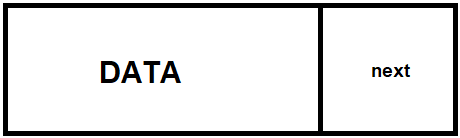



In [ ]:
class Node:
  def __init__(self):
    # parameters ---> private to this class
    self.__URL = self.__setURL__()
    self.__timeStamp,self.__bucketIndex = self.__setTimeData__()
    # link
    self.next = None
  
  ###############################
  
  # Setters
  def __setTimeData__(self):
    now = datetime.now()
    nowStr1 = now.strftime("%d/%m/%Y %H:%M:%S")

    nowStr2 = str(nowStr1[:10])   
    bucketIndex = numericToHashValue(nowStr2)
    
    return nowStr1,bucketIndex
    
  
  def __setURL__(self):
    flag = False
    url = input("Enter the URL: ")
    if url[:4] == 'www.' or url[:4] == 'http':
      flag = True
    while not flag:
      url = input("Invalid URL! Enter a valid URL: ")
      if url[:4] == 'www.' or url[:4] == 'http':
        flag = True
    return url
  
  
  ############################

  # Getters  
  def getTimeStamp(self):
    return self.__timeStamp
  
  def getURL(self):
    return self.__URL
  
  def getBucketIndex(self):
    return self.__bucketIndex
  
  #############################
  # Display

  def printNodeData(self):
    print("\nDate = ",self.getTimeStamp())
    print("Visited URL = ",self.getURL())
    #print("Bucket Index = ",self.getBucketIndex())
    return

### Bucket

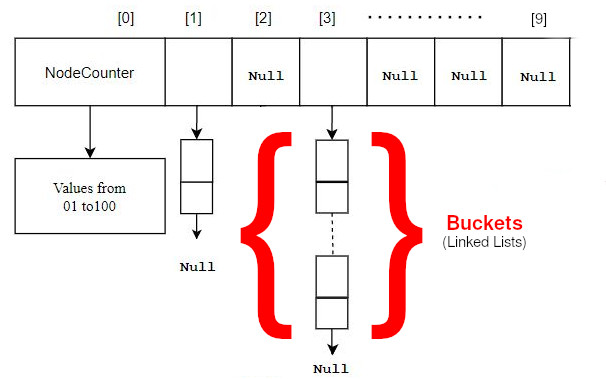



In [ ]:
## structure of the Bucket to store every history as a details (as one NODE)
class bucketLinkedList:
  def __init__(self):
    self.head = None
    self.tail = None

  # checking underflow condition
  def __checkUnderflow__(self):
    if self.head == None:
      return True
    return False
  
  #######################################
  # adding the element
  #######################################

  def addNode(self, node):
    temp = node
    if self.head is None:
      self.head = self.tail = temp
    else:
      temp.next = self.head
      self.head = temp
  
  #######################################
  # deleting the url
  #######################################

  def deleteData(self, url):
    if self.__checkUnderflow__():
      return False
    
    temp = self.head    
    if temp.getURL() == url:
      self.head = self.head.next
      return True
    else:
      while temp.next is not None:
        if temp.next.getURL() == url:
          temp.next = temp.next.next
          return True
        temp = temp.next
    return False
  
  #######################################
  # searching
  #######################################

  def checkDuplicateEntries(self, URL):
    if self.__checkUnderflow__():
      return False
    temp=self.head
    flagFound = False
    COUNT = 0
    while(temp):
      if temp.getURL() == URL:
        COUNT += 1
        flagFound = True
      temp = temp.next
    if flagFound:
      return COUNT
    else:
      return False
  
  def trackDateWise(self, time):
    if self.__checkUnderflow__():
      return
    temp=self.head
    flag = False
    while(temp):
      if temp.getTimeStamp()[:10] == time:
        flag = True
        print("->",temp.getURL())
      temp = temp.next
    return flag
  
  #######################################
  # Print
  #######################################
  
  def printList(self):
    if self.__checkUnderflow__():
      return
    temp=self.head
    while(temp):
      temp.printNodeData()
      temp = temp.next
    print("\n")
    return
  
  def printURLOnly(self):
    if self.__checkUnderflow__():
      return
    temp=self.head
    while(temp):
      print("->",temp.getURL())
      time.sleep(0.15)
      temp = temp.next
    return

### Bucket Holder Array

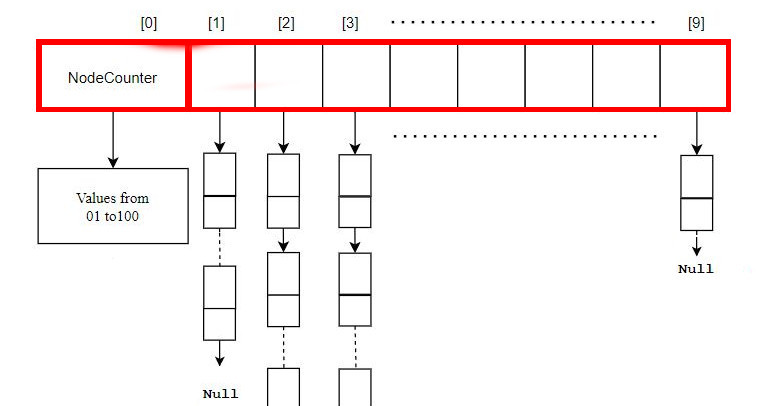

In [ ]:
class historyTracker:
  def __init__(self):
    self.totalNodes = 0
    self.history = self.__freshMemory__()
    self.backup = None ## holds the backup
  

  #########################################
  #######     Private Functions     #######
  #########################################

  def __totalNodeCounter__(self, added):  # added is boolean val
    if added:
      self.totalNodes += 1  # increament total node count by 1
    else:
      self.totalNodes -= 1  # decreament total node count by 1
    self.history[0] = self.totalNodes
    return
  
  def __freshMemory__(self):
    ## Init
    
    self.bkt1 = bucketLinkedList()
    self.bkt2 = bucketLinkedList()
    self.bkt3 = bucketLinkedList()
    self.bkt4 = bucketLinkedList()
    self.bkt5 = bucketLinkedList()
    self.bkt6 = bucketLinkedList()
    self.bkt7 = bucketLinkedList()
    self.bkt8 = bucketLinkedList()
    self.bkt9 = bucketLinkedList()
    
    self.totalNodes = 0
    initArray = [self.totalNodes,self.bkt1,self.bkt2,self.bkt3,self.bkt4,self.bkt5,self.bkt6,self.bkt7,self.bkt8,self.bkt9]
    return initArray

  # checking overflow condition
  def __checkUnderflow__(self):
    if self.totalNodes == 0:
      print("Browsing history is empty!!\n")
      return True
    return False
  
  #########################################
  #########################################

  
  #########################################
  #######      Public Functions     #######
  #########################################

  #######      Insert
  def insert(self):
    if self.totalNodes == 100:  # 
      print("Ooops!! Not enough memory, insertion is not possible!")
      return False
    else:
      self.__totalNodeCounter__(True)
      newEntry = Node()
      index = newEntry.getBucketIndex()
      if index < 10:
        temp = self.history[index]
        self.history[index].addNode(newEntry)
        
        ##################################
        dupCount = 0
        flagURL = False
        for index in range(1,10):
          searched = self.history[index].checkDuplicateEntries(newEntry.getURL()) # list 
          if searched:
            dupCount += searched
            if dupCount > 1:
              flagURL = True
              break
        if flagURL:
          print("Another duplicate URL added!!")
        else:
          print("Added!!")
        ##################################
        
      else:
        print("Error in hash function! Insertion failed!!")
      return True
  

  #######      Remove first occurance    

  def delete(self):
    if not self.__checkUnderflow__():
      url = input("Enter the url to remove from the tracked history: ")
      
      if (url[:4] != 'www.'):
        if (url[:4] != 'http'):
          print("Invalid URL entered! Terminating deletion!!")
          return False
      
      flag = False
      for index in range(1,10):
        if self.history[index] is not None:
          if self.history[index].deleteData(url):
            flag = True
            self.__totalNodeCounter__(False)  # false means decrement the counter (see fun defination)
      if flag:
        print("One occurance removed from the browsing history!")
      else:
        print("Provided URL does not exist in browsing history! Deletion failed!!")
      return True
    return False


  #######      All History 
  def historyViewer(self):
    if not self.__checkUnderflow__():
      tempChoice = input("\nPress 'Y' for detailed history: ")

      print("\n\n\nListing your browsing history:\n------------------------------")
      index = 1
      while index < 10:
        if self.history[index] is not None:
          if tempChoice == 'y' or tempChoice == 'Y':
            # (in Detail)
            self.history[index].printList()
          else:
            # (URLs Only)
            self.history[index].printURLOnly()
        index += 1
      return True
    return False


  #######      Search
  def search(self):
    ## by url
    if not self.__checkUnderflow__():
      print("\n1. Search by URL \n2. Search by Date\n")
      tempChoice = input("Enter your choice: ")
      if tempChoice == '1':
        url = input("Enter the URL: ")
        if (url[:4] != 'www.'):
          if (url[:4] != 'http'):
            print("Invalid URL entered! Terminating search!!")
            return False
        
        flagURL = False
        dupCount = 0
        for index in range(1,10):
          searched = self.history[index].checkDuplicateEntries(url) # list 
          if searched:
            dupCount += searched
            flagURL = True
        if flagURL:
          print("\n\n"+str(dupCount),"duplicate entries found for:\n->",url)
        else:
          print("No history found!\n")
      
      ## by date
      elif tempChoice == '2':
        flagTime = False
        date = input("Enter the Date (dd/mm/yyyy): ")
        if re.search('^(0[1-9]|[12][0-9]|3[01])[/.](0[1-9]|1[012])[/.](19|20)\d\d$', date):
          hashValue = numericToHashValue(date)
          print("\n\nOn",date+", you visited:\n----------------------------")
          if not self.history[hashValue].trackDateWise(date): # returns false if element was not there
            print("\nNo history available!")
        else:
          print("\nInvalid date entered!!")
      
      else:
        print("\nInvalid choice!!")
      
      return True
    return False
  

  #######      Format Memory
  def refreshMemory(self):
    if not self.__checkUnderflow__():
      print("Are you sure you want to refresh?? It's suggested to take a backup first!!")
      tempChoice = input("\n1. Take Backup \n2. I already have it! Refresh anyways!!\n\nYour choice: ")
      if tempChoice == '1':
        backup = self.backupHistory()
      if tempChoice == '1' or tempChoice == '2':
        self.history=self.__freshMemory__()
        print("\nMemory Refreshed!!")
        return True
      else:
        print("Invalid input!!")
    return False
  

  #######      Backup
  def backupHistory(self):
    if not self.__checkUnderflow__():
      print("\nHold on! We're taking the backup!!...")
      time.sleep(2)
      arrLen = len(self.history)
      backup = bucketLinkedList()
      for index in range (1,(arrLen-1)):
        if backup.head is None:
          backup.head = self.history[index].head
          backup.tail = self.history[index].tail
        if backup.tail is not None:
          backup.tail.next = self.history[index+1].head
          backup.tail = self.history[index+1].tail
      print("Backup completed successfully!")
      self.backup = bucketLinkedList()
      self.backup = backup
      tempChoice = input("\nWant to refresh memory? (y/n): ")
      if tempChoice == 'y' or tempChoice == 'Y':
        self.history = self.__freshMemory__()
        print("\nMemory Refreshed!!")
      return True
    return False


  #######      Restore
  def restoreBackup(self):
    if self.backup is not None:
      self.history = self.__freshMemory__()
      print("\nHold on! We're restoring your Backup...")
      time.sleep(2)

      tempNode = self.backup.head      
      while tempNode is not None:
        index = tempNode.getBucketIndex()
        newNode = tempNode
        tempNode = tempNode.next
        newNode.next = None
        self.history[index].addNode(newNode)
        self.totalNodes += 1
      self.history[0] = self.totalNodes
      print("\n"+str(self.totalNodes),"entries restored!!")
      return True
    
    else:
      print("\nNo Backup Found!!")
      return False


  #######      Total History Counts
  def countHistory(self):
    if not self.__checkUnderflow__():
      print("\nTotal URLs in tracked history:",self.totalNodes)
      return True
    return False
  
  

  #########################################
  #########################################

  



## **Users' Zone**

### Main-Menu

In [ ]:
def menu():
  # Printing Menu
  print("\nMain Menu:")
  print("""----------
        \n1. Add a Visited URL  \n2. Delete a Visited URL  \n3. View Your Browsing History \n4. Track a Visited URL \n5. Format Browsing History \n6. History Backup \n7. Restore History Backup  \n8. Total Tracked URLs \n
        \n** Any other key to exit!!\n
        """)
  return input("Enter your choice: ")

# **Main-Function**


In [ ]:
if __name__ == "__main__":

  ## Showing Menu
  thisTracker = historyTracker()

  while (True): 
    clear_output()
    choice = menu()
    
    ## Decision
    if choice == '1':
      # Add a Visited URL
      clear_output(wait=True) 
      flag = thisTracker.insert()
      tempChoice = 'y'
      while flag and (tempChoice == 'y' or tempChoice == 'Y'):
        clear_output(wait=True) 
        tempChoice = input("\nWanna add another URL? (Y/N): ")
        if tempChoice == 'y' or tempChoice == 'Y':
          flag = thisTracker.insert()
        else:
          break
      if not flag:
        input("\nPress Enter!!")
      
    
    elif choice == '2':
      # Delete a Visited URL
      clear_output(wait=True) 
      flag = thisTracker.delete()
      tempChoice = 'y'
      while flag and (tempChoice == 'y' or tempChoice == 'Y'):
        clear_output(wait=True) 
        tempChoice = input("\nWanna delete another history? (Y/N): ")
        if tempChoice == 'y' or tempChoice == 'Y':
          flag = thisTracker.delete()
        else:
          break
      if not flag:
        input("\nPress Enter!!")
    
    elif choice == '3':
      # Show Complete Browsing History
      clear_output(wait=True) 
      thisTracker.historyViewer()
      input("\nPress Enter!!")  
    
    elif choice == '4':
      # Find a Visited URL
      clear_output(wait=True) 
      flag = thisTracker.search()
      tempChoice = 'y'
      while flag and (tempChoice == 'y' or tempChoice == 'Y'):
        clear_output(wait=True) 
        tempChoice = input("\nWanna track history again? (Y/N): ")
        if tempChoice == 'y' or tempChoice == 'Y':
          flag = thisTracker.search()
        else:
          break
      if not flag:
        input("\nPress Enter!!") 
    
    elif choice == '5':
      # Format Browsing History
      clear_output(wait=True) 
      thisTracker.refreshMemory()
      input("\nPress Enter!!")  
    
    elif choice == '6':
      # Backup Browsing History
      clear_output(wait=True) 
      thisTracker.backupHistory()
      input("\nPress Enter!!")  
    
    elif choice == '7':
      # Restore Browsing History
      clear_output(wait=True)
      thisTracker.restoreBackup()
      input("\nPress Enter!!")  
    
    elif choice == '8':
      # Total Tracked URLs
      clear_output(wait=True)
      thisTracker.countHistory()
      input("\nPress Enter!!")
    
    else:
      del(thisTracker)
      clear_output()
      print("\nGood Bye!!")
      break
  

  


Good Bye!!
